# 💻**Kookmin University 정보보호와 시스템보안 - AI 악성코드탐지 프로젝트 과제**💻
### **팀명 : 1719**
### **팀원 : 20171594 김선우, 20171726 황효빈, 20191584 남상림**


# **< 목차 >**
## 1. 필요한 라이브러리 설치하기
## 2. 구글 드라이브 연동하기
## 3. csv에서 라벨 값을 가져오기
## 4. 학습 데이터와 검증 데이터 생성하기
 - Ember
 - PE-Miner

## 5. 학습 및 테스트 진행
 - Ember
 - PE-Miner
 
## 6. 3개의 머신러닝 모델로 소프트 보팅 수행하기
## 7.	테스트 데이터에 대한 모델의 예측 결과를 csv파일로 만들기
## 8. 프로젝트 소감

## 1. 필요한 라이브러리 설치하기

In [ ]:
!pip install lief
!pip install numpy
!pip install sklearn
!pip install tqdm
!pip install graphviz
!pip install lightgbm

     |████████████████████████████████| 3.5MB 6.0MB/s 


- 설치한 라이브러리들을 불러온다.

In [ ]:
import os
import json

import numpy as np
import pandas as pd
import csv

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import lightgbm

from matplotlib import pyplot as plt
%matplotlib inline

## 2. 구글 드라이브 연동하기

In [ ]:
from google.colab import drive 
drive_path = '/content/gdrive/'
drive.mount(drive_path)

# 압축 풀기
!unzip /content/gdrive/My\ Drive/데이터.zip

import sys
sys.path.append(drive_path + "My Drive")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: PESTUDIO/학습데이터/bd9cf98f928470d06332223ddd84b0ac9af055a54a07775b75a497b4cc947919.json  
  inflating: PESTUDIO/학습데이터/bda2ab110f80f6fa79b3d650b6ae4565d8e840d7ba5b69e38c2874f63cc423a8.json  
  inflating: PESTUDIO/학습데이터/bda37d4ed18f33df81f03823e62707da458120a021d0878d6c450b5c0f157f3f.json  
  inflating: PESTUDIO/학습데이터/bdaa46116f28aeae7c99d9d18a06d9ed3181ed82a6e719fb0956e9672c2012cf.json  
  inflating: PESTUDIO/학습데이터/bdab51b550107ca68011548a4a84aae5115dcf9d9210e91cd9bfde15406a4a64.json  
  inflating: PESTUDIO/학습데이터/bdaf361591e90d89a9adbb3d070f27635029b705fcbbd99f7cfed738262e0d2b.json  
  inflating: PESTUDIO/학습데이터/bdb0b50f0281fedb6477b5202e460c0e6613a650f5352f5ddc4aa6ce5cb570b5.json  
  inflating: PESTUDIO/학습데이터/bdb251111c8b6ee237092544abbcc81daa8c6e237459bd497fe8f840f6d24d12.json  
  inflating: PESTUDIO/학습데이터/bdb46fc3b901bbecaf104504ea723df0512f77d037343c91e6db0f731c00d048.json  
  inflating: PESTUDIO/학습데이터/bdb60ce6b039af2a7842b56c24dcd5a88d32

## 3. csv에서 라벨 값을 가져오기
- pandas를 사용하여 csv 파일을 읽어온다.

In [ ]:
train_csv = pd.read_csv("/content/gdrive/MyDrive/학습데이터_정답.csv", encoding="cp949")
valid_csv = pd.read_csv("/content/gdrive/MyDrive/검증데이터_정답.csv", encoding="cp949")

In [ ]:
# PE-Miner 에서 사용한 특징의 이름
peminer_header = ['ADVAP132.DLL', 'AWFAXP32.DLL', 'AWFXAB32.DLL', 'AWPWD32.DLL', 'AWRESX32.DLL', 'AWUTIL32.DLL', 'BHNETB.DLL', 'BHSUPP.DLL', 'CCAPI.DLL', 'CCEI.DLL', 'CCPSH.DLL', 'CCTN20.DLL', 'CMC.DLL', 'COMCTL32.DLL', 'COMDLG32.DLL', 'CRTDLL.DLL', 'DCIMAN.DLL', 'DCIMAN32.DLL', 'DSKMAINT.DLL', 'FileHeader.Characteristics', 'FileHeader.Machine', 'FileHeader.NumberOfSections', 'FileHeader.NumberOfSymbols', 'FileHeader.PointerToSymbolTable', 'FileHeader.SizeOfOptionalHeader', 'FileHeader.TimeDateStamp', 'GDI32.DLL', 'GROUP.DLL', 'HYPERTERM.DLL', 'KERNL32.DLL', 'LZ32.DLL', 'MAPI.DLL', 'MAPI32.DLL', 'MFC30.DLL', 'MPR.DLL', 'MSFS32.DLL', 'MSNDUI.DLL', 'MSNET32.DLL', 'MSPST32.DLL', 'MSSHRUI.DLL', 'MSVIEWUT.DLL', 'NAL.DLL', 'NDIS30.DLL', 'NETAPI.DLL', 'NETAPI32.DLL', 'NETBIOS.DLL', 'NETDI.DLL', 'NETSETUP.DLL', 'NWAB32.DLL', 'NWNET32.DLL', 'NWNP32.DLL', 'OLEDLG.DLL', 'OptionalHeader.AddressOfEntryPoint', 'OptionalHeader.BaseOfCode', 'OptionalHeader.BaseOfData', 'OptionalHeader.CheckSum', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BASERELOC.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BASERELOC.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BOUND_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BOUND_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_COM_DESCRIPTOR.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_COM_DESCRIPTOR.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DEBUG.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DEBUG.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DELAY_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DELAY_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXCEPTION.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXCEPTION.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_GLOBALPTR.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_GLOBALPTR.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IAT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IAT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_LOAD_CONFIG.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_LOAD_CONFIG.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESERVED.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESERVED.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESOURCE.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESOURCE.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_TLS.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_TLS.VirtualAddress', 'OptionalHeader.DllCharacteristics', 'OptionalHeader.FileAlignment', 'OptionalHeader.ImageBase', 'OptionalHeader.LoaderFlags', 'OptionalHeader.Magic', 'OptionalHeader.MajorImageVersion', 'OptionalHeader.MajorLinkerVersion', 'OptionalHeader.MajorOperatingSystemVersion', 'OptionalHeader.MajorSubsystemVersion', 'OptionalHeader.MinorImageVersion', 'OptionalHeader.MinorLinkerVersion', 'OptionalHeader.MinorOperatingSystemVersion', 'OptionalHeader.MinorSubsystemVersion', 'OptionalHeader.NumberOfRvaAndSizes', 'OptionalHeader.Reserved1', 'OptionalHeader.SectionAlignment', 'OptionalHeader.SizeOfCode', 'OptionalHeader.SizeOfHeaders', 'OptionalHeader.SizeOfHeapCommit', 'OptionalHeader.SizeOfHeapReserve', 'OptionalHeader.SizeOfImage', 'OptionalHeader.SizeOfInitializedData', 'OptionalHeader.SizeOfStackCommit', 'OptionalHeader.SizeOfStackReserve', 'OptionalHeader.SizeOfUninitializedData', 'OptionalHeader.Subsystem', 'POWERCFG.DLL', 'RASAPI16.DLL', 'RASAPI32.DLL', 'RASPI.DLL', 'RPCLTC1.DLL', 'RPCNS4.DLL', 'RPCRT4.DLL', 'RPCTLC3.DLL', 'RPCTLC5.DLL', 'RPCTLC6.DLL', 'RPCTLS3.DLL', 'RPCTLS5.DLL', 'RPCTLS6.DLL', 'RSRC32.DLL', 'Resource.Characteristics', 'Resource.MajorVersion', 'Resource.MinorVersion', 'Resource.NumberOfIdEntries', 'Resource.NumberOfNamedEntries', 'Resource.RT_ACCELERATOR', 'Resource.RT_BITMAP', 'Resource.RT_CURSOR', 'Resource.RT_DIALOG', 'Resource.RT_DLGINCLUDE', 'Resource.RT_FONT', 'Resource.RT_FONTDIR', 'Resource.RT_GROUP_CURSOR', 'Resource.RT_GROUP_ICON', 'Resource.RT_ICON', 'Resource.RT_MENU', 'Resource.RT_MESSAGETABLE', 'Resource.RT_RCDATA', 'Resource.RT_STRING', 'Resource.RT_VERSION', 'Resource.TimeDateStamp', 'SAPNSP.DLL', 'SECUR32.DLL', 'SHELL32.DLL', 'SHLWAPI.DLL', 'SLENH.DLL', 'Section.data.Characteristics', 'Section.data.NumberOfLinenumbers', 'Section.data.NumberOfRelocations', 'Section.data.PointerToLinenumbers', 'Section.data.PointerToRawData', 'Section.data.PointerToRelocations', 'Section.data.SizeOfRawData', 'Section.data.VirtualAddress', 'Section.data.VirtualSize', 'Section.rsrc.Characteristics', 'Section.rsrc.NumberOfLinenumbers', 'Section.rsrc.NumberOfRelocations', 'Section.rsrc.PointerToLinenumbers', 'Section.rsrc.PointerToRawData', 'Section.rsrc.PointerToRelocations', 'Section.rsrc.SizeOfRawData', 'Section.rsrc.VirtualAddress', 'Section.rsrc.VirtualSize', 'Section.text.Characteristics', 'Section.text.NumberOfLinenumbers', 'Section.text.NumberOfRelocations', 'Section.text.PointerToLinenumbers', 'Section.text.PointerToRawData', 'Section.text.PointerToRelocations', 'Section.text.SizeOfRawData', 'Section.text.VirtualAddress', 'Section.text.VirtualSize', 'UMDM32.DLL', 'USER32.DLL', 'VERSION.DLL', 'WININET.DLL', 'WINMM.DLL', 'WINREG.DLL', 'WINSOCK.DLL', 'WS2.DLL', 'WSOCK32.DLL']

## 4. 학습 데이터와 검증 데이터 생성하기
#### - Ember 와 PE-Miner의 데이터를 각각 생성하였다.

- Ember 데이터 생성

In [ ]:
import pickle

def read_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

# train data
eX_train = read_pickle(os.path.join(drive_path, "My Drive", "ember_train_features.pkl"))
ey_train = read_pickle(os.path.join(drive_path, "My Drive", "ember_train_labels.pkl"))

# valid data
eX_valid = read_pickle(os.path.join(drive_path, "My Drive", "ember_test_features.pkl"))
ey_valid = read_pickle(os.path.join(drive_path, "My Drive", "ember_test_labels.pkl"))

print(eX_train.shape)
print(ey_train.shape)
print(eX_valid.shape)
print(ey_valid.shape)

(20000, 2381)
(20000,)
(20000, 2381)
(20000,)


- PE-Miner 데이터 생성

In [ ]:
# train data
X_train = pd.DataFrame(np.load(os.path.join(drive_path, "My Drive", "/content/gdrive/MyDrive/new_peminer_train_features.npy")), columns=peminer_header)
y_train = np.load(os.path.join(drive_path, "My Drive", "/content/gdrive/MyDrive/new_peminer_train_labels.npy"))

# valid data
X_valid = pd.DataFrame(np.load(os.path.join(drive_path, "My Drive", "/content/gdrive/MyDrive/new_peminer_test_features.npy")), columns=peminer_header)
y_valid = np.load(os.path.join(drive_path, "My Drive", "/content/gdrive/MyDrive/new_peminer_test_labels.npy"))

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(20000, 188)
(20000,)
(20000, 188)
(20000,)


##5. 학습 및 테스트 진행

 - Ember   
모든 피처를 사용했을 때의 정확도 : 약 0.94635

In [ ]:
#Ember
#Feature importance를 측정하기 위해 학습

clf = RandomForestClassifier()
clf.fit(eX_train, ey_train)
y_pred = clf.predict(eX_valid)
print('[Ember] 모든 피처를 사용했을 때의 정확도 :', accuracy_score(ey_valid, y_pred))

[Ember] 모든 피처를 사용했을 때의 정확도 : 0.94635


- PE-Miner   
모든 피처를 사용했을 때의 정확도 : 약 0.9544

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
print('[PE-Miner] 모든 피처를 사용했을 때의 정확도 :', accuracy_score(y_valid, y_pred))

[PE-Miner] 모든 피처를 사용했을 때의 정확도 : 0.9544


- 모든 피처를 사용했을 때의 정확도가 Ember(0.94635)보다 PE-Miner(0.9544)에서 더 높게 나왔다.
- 따라서 PE-Miner를 채택하여 진행하였다.

#### 특징 중요도 그래프
- PE-Miner의 특징 중요도 상위 24개를 시각화 하여 한 눈에 볼 수 있도록 하였다.

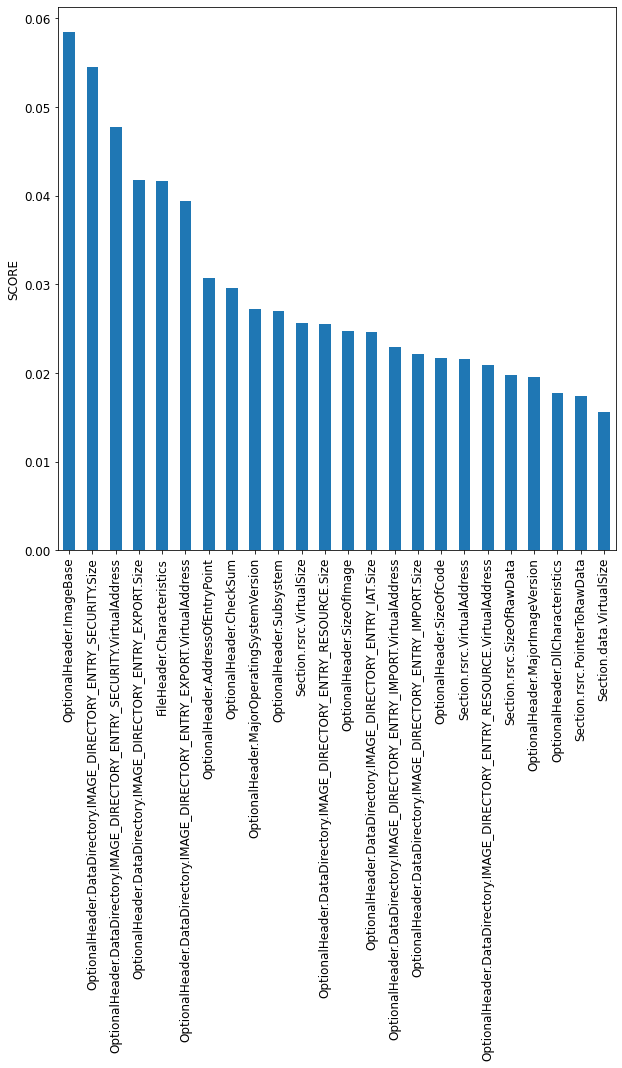

In [ ]:
  plt.figure(figsize=(10, 10))
  feat_importances = pd.Series(clf.feature_importances_, index=peminer_header)
  feat_importances.nlargest(24).plot(kind='bar')
  plt.ylabel("SCORE", fontsize=12)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=12)
  plt.savefig("Peminer Importance")

In [ ]:
# 피처 중요도를 dataframe으로 만들기
feature_importances = pd.DataFrame(clf.feature_importances_, index = peminer_header, columns=['importance']).sort_values('importance', ascending=False)

### feature selection 을 통해 어떤 피처를 선택했을 때 정확도가 가장 높게 나오는지 찾아보도록 한다.

In [ ]:
# 피처 중요도가 0 이상인 피처들만 선택하여 학습
used_col = list(feature_importances[feature_importances["importance"] > 0].index)
used_X_train = X_train[used_col] 
used_X_train = used_X_train.to_numpy()
clf =  RandomForestClassifier()
clf.fit(used_X_train, y_train)
used_X_valid = X_valid[used_col]
used_X_valid = used_X_valid.to_numpy()
y_pred = clf.predict(used_X_valid)
print('피처 중요도가 0 이상인 피처들만 선택하여 학습했을 때의 정확도 :', accuracy_score(y_valid, y_pred))

피처 중요도가 0 이상인 피처들만 선택하여 학습했을 때의 정확도 : 0.95365


In [ ]:
# 피처 중요도가 0.01 이상인 피처들만 선택하여 학습
used_col = list(feature_importances[feature_importances["importance"] > 0.01].index)
used_X_train = X_train[used_col] 
used_X_train = used_X_train.to_numpy()
clf =  RandomForestClassifier()
clf.fit(used_X_train, y_train)
used_X_valid = X_valid[used_col]
used_X_valid = used_X_valid.to_numpy()
y_pred = clf.predict(used_X_valid)
print('피처 중요도가 0.01 이상인 피처들만 선택하여 학습했을 때의 정확도 :', accuracy_score(y_valid, y_pred))

피처 중요도가 0.01 이상인 피처들만 선택하여 학습했을 때의 정확도 : 0.9517


- 모든 피처들로 학습했을 때 정확도 : 약 0.9544
- 피처 중요도가 0 이상인 피처들로 학습했을 때 정확도 : 약 0.95365
- 피처 중요도가 0.01 이상인 피처들로 학습했을 때 정확도 : 약 0.9517

- 따라서 가장 높은 정확도를 보인, "모든" 피처를 사용하여 모델을 학습시키기로 한다.


## 6. 3개의 머신러닝 모델로 소프트 보팅 수행하기


- LGBMClassifier모델의 최적 파라미터 값을 찾기 위해 파라미터 튜닝을 시도하였다.
- 아래 코드는 로컬 주피터에서 돌려보았으며, 실행시간이 길어 실행 일부의 캡쳐본을 첨부한다.

In [ ]:
from itertools import product
from tqdm import tqdm

params = [["gbdt"], ["binary"], [300, 600, 900], [0.005, 0.01, 0.05, 0.1], 
          [184, 368, 763], [0.7, 0.8, 0.9, 1.0], [0.7, 0.8,  0.9, 1.0]]
params = list(product(*params))

max_accuracy = 0
Best_numIterations = 0
Best_learningRate= 0
Best_numLeaves= 0
Best_featureFraction= 0
Best_baggingFraction= 0

for b_t, oj, n_i, ir, n_l, f_f, b_f in tqdm(params):
    lgbm = lightgbm.LGBMClassifier(
            boosting_type = b_t,
            objective = oj,
            num_iterations = n_i ,
            learning_rate = ir,
            num_leaves = n_l,
            feature_fraction = f_f,
            bagging_fraction = b_f )
    lgbm.fit(X_train, y_train)
    pred = lgbm.predict(X_valid)
    accuracy = accuracy_score(y_valid, pred)
    print(b_t, oj, n_i, ir, n_l, f_f, b_f, "accuracy", accuracy)
    if max_accuracy < accuracy:
        max_accuracy = accuracy
        Best_numIterations = n_i
        Best_learningRate = ir
        Best_numLeaves= n_l
        Best_featureFraction= f_f
        Best_baggingFraction= b_f
        
print("max_accurcay : ", max_accuracy)
print("numIterations : ", Best_numIterations)
print("learningRate : ", Best_learningRate)
print("numLeaves : ", Best_numLeaves)
print("featureFraction : ", Best_featureFraction)
print("baggingFraction : ", Best_baggingFraction)

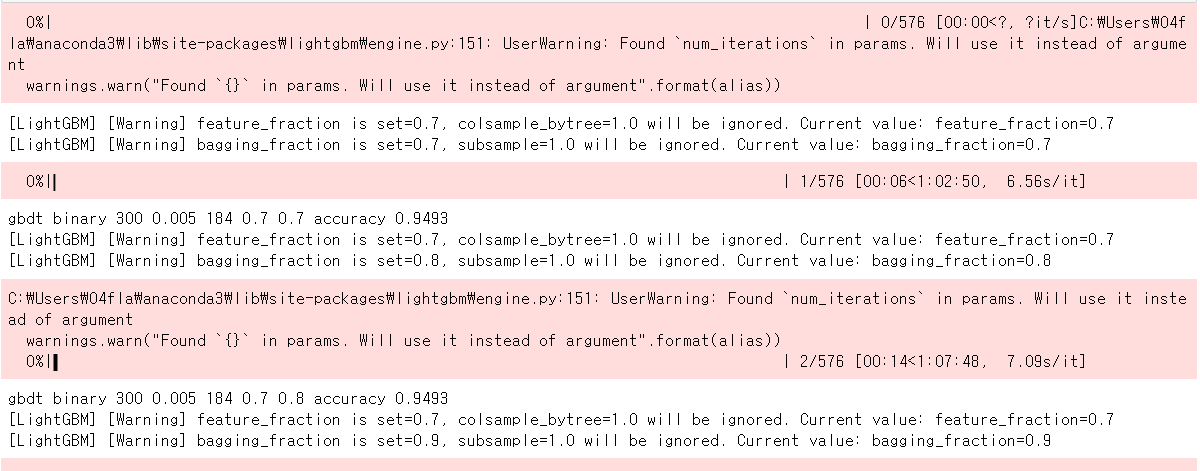

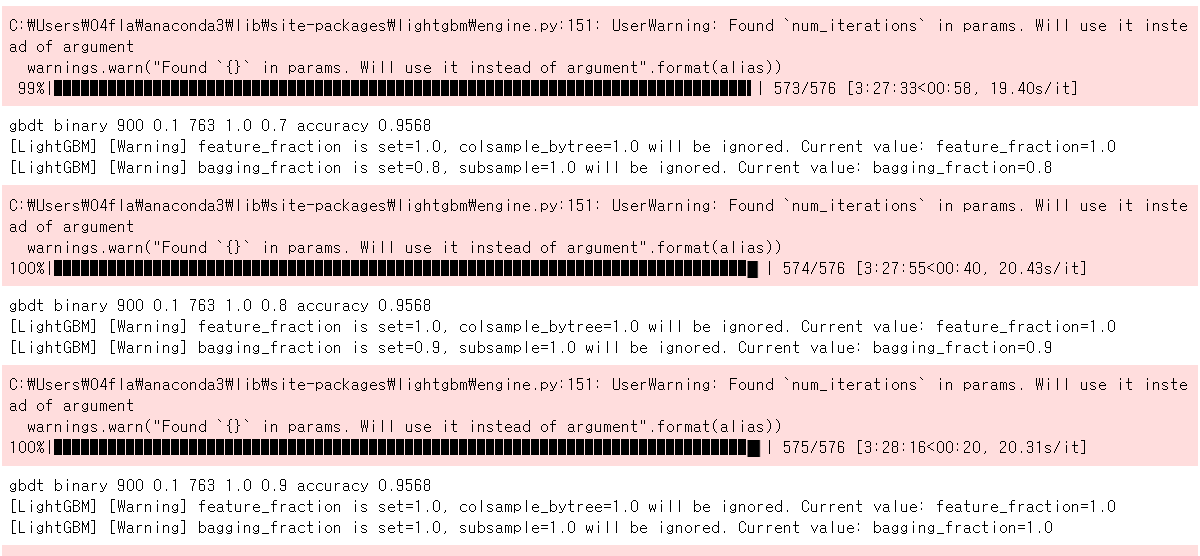

### 여러 개의 파라미터 값을 반복문을 통하여 확인해 본 결과 정확도가 가장 높게 나오는 최적의 값을 찾을 수 있었다.
#### < 위 과정을 통해 얻어 낸 최적의 파라미터 값 >

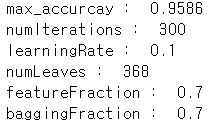

### 찾아 낸 최적의 파라미터 값을 넣은 머신러닝 모델로 소프트 보팅을 수행한다.
 - 사용한 머신러닝 모델 : RandomForestClassifier, SVC, LGBMClassifier

In [ ]:
# 3개의 모델로 소프트 보팅 수행
from lightgbm import LGBMClassifier

models = [
    ('rfc', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('lgbm', LGBMClassifier(boosting_type="gbdt",
        objective="binary",
        num_iterations=300 ,
        learning_rate=0.1,
        num_leaves=368,
        feature_fraction=0.7,
        bagging_fraction=0.7
        )
    ),
]
soft_vote  = VotingClassifier(models, voting='soft')
soft_vote.fit(X_train, y_train)
pred = soft_vote.predict(X_valid)
print('앙상블 결과의 정확도 :', accuracy_score(y_valid, pred))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


앙상블 결과의 정확도 : 0.9588


- 3가지의 모델을 앙상블 해 본 결과, RandomForestClassifier만 사용했을 때(약 0.9544)보다 정확도가 약 0.9588로 증가하였다.



## 7.	테스트 데이터에 대한 모델의 예측 결과를 csv파일로 만들기
(정상 파일: 0, 악성 파일: 1)

In [ ]:
# test data 생성
test_path = r"/content/PEMINER/테스트데이터"
test_files = []
test_df = pd.DataFrame()
for file in os.listdir(test_path):
    test_files.append(file)
for file in test_files: 
    with open(test_path + "//" + file) as json_file:
        json_data = json.load(json_file)
    temp = pd.DataFrame.from_dict(json_data, orient='index')
    temp = temp.T
    temp.index = [file.split(".")[0]]
    test_df = pd.concat([test_df, temp])

In [ ]:
X_test = test_df.to_numpy()

# test data 예측
test_pred = soft_vote.predict(X_test)

In [ ]:
# predict.csv에 test data의 예측 값 입력
f = open("predict.csv", "wt", encoding="utf-8", newline="")
writer = csv.writer(f)
writer.writerow(["file", "predict"])
for i in range(10000):
    writer.writerow([test_files[i].split(".")[0], test_pred[i]])

## 8. 프로젝트 소감

- 20171594 김선우
  
  인공지능을 배우지 않은 2학년으로써 프로젝트를 진행하는데 사실 많은 어려움이
  있었습니다. 2학년 1학기 때 수치해석 프로젝트를 진행하면서 머신러닝과 모델에
  대한 개념을 이해해뒀던 부분이 정말 많은 도움이 되었습니다. 사실 머신러닝은
  제가 관심이 별로 없던 부분이였는데 이번 악성코드 분류 프로젝트까지 진행하면서
  나름 많은 관심을 가질 수 있는 계기가 되었고 이 후 다른 개인 프로젝트나 팀
  프로젝트를 진행하며 이번과 같은 협업의 경험도 도움이 많이 될 것 같다고
  느꼈습니다.

- 20171726 황효빈   
다뤄보지 않았던 머신러닝 분야와 관련된 프로젝트를 진행해보니, 처음에는 모델을 다루는 부분에 어려움이 있었습니다. 또한 악성코드 추출 기법과 추출된 데이터를 이해하기 쉽지 않았습니다.   
하지만 이론으로만 배우지 않고, 프로젝트를 직접 진행해보면서 결국 더 빠르고 큰 배움을 얻을 수 있었습니다. 모델에 파라미터 값을 달리 해보고 다양한 모델로 훈련시킨 후 에측 정확도를 보는 것에 보람도 느꼈습니다.   
기술적인 측면 뿐만 아니라 기존에는 악성코드 분류가 true/false로 나누는 간단한 작업이라고 생각했었습니다. 그러나 굉장히 많은 특징을 기준으로 악성코드를 분류한다는 것을 새롭게 알 수 있었던 기회였습니다.

- 20191584 남상림

  2학년 과정의 배움만을 가지고 고학년 수업을 듣는다는 것은 확실히 어려운 부분이 많았다. 특히 배운 이론을 가지고 직접 구현을 하는 부분에 있어서는 다양한 경험이 부족해서인지 헤메기도 했다.
  하지만 이번 악성코드 탐지 프로젝트를 팀원들과 함께 진행하며 부족한 부분을 채워나갈 수 있었다.
  특징 벡터를 생성하는 것 부터 어려움을 겪었지만 주어진 튜토리얼 코드가 많은 도움이 되었다. 또한 머신러닝 모델을 학습하는 과정에서 더 좋은 파라미터 값을 찾기 위한 과정을 겪으며 좀 더 코드에 대한 이해를 하게 되었고 그렇게 얻어낸 최적의 값들을 넣고 학습을 시켰을 때 정확도가 점점 올라가는 것을 보며 뿌듯함을 느꼈다.
  쉽지 않은 과정이었지만 팀원들과 틈틈이 공부하며 역할분담을 통해 프로젝트를 진행하니 순조롭게 마무리 할 수 있었던 것 같다.